In [ ]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.8.2'

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/AIML/Mentor_Deck/Module 9 - Computer Vision/Week 5 - CV  - Mentor deck/Case Study/')

In [ ]:
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/Colab Notebooks/AIML/Mentor_Deck/Module 9 - Computer Vision/Week 5 - CV  - Mentor deck/Case Study/data_semantics.zip','r') as z:
    z.extractall()

In [ ]:


IMAGE_HEIGHT = 128
IMAGE_WIDTH = 128


In [ ]:
import os
original  = os.listdir('training/image_2')

In [ ]:
print(original)

['000000_10.png', '000001_10.png', '000002_10.png', '000003_10.png', '000004_10.png', '000005_10.png', '000006_10.png', '000007_10.png', '000008_10.png', '000009_10.png', '000010_10.png', '000011_10.png', '000012_10.png', '000013_10.png', '000014_10.png', '000015_10.png', '000016_10.png', '000017_10.png', '000018_10.png', '000019_10.png', '000020_10.png', '000021_10.png', '000022_10.png', '000023_10.png', '000024_10.png', '000025_10.png', '000026_10.png', '000027_10.png', '000028_10.png', '000029_10.png', '000030_10.png', '000031_10.png', '000032_10.png', '000033_10.png', '000034_10.png', '000035_10.png', '000036_10.png', '000037_10.png', '000038_10.png', '000039_10.png', '000040_10.png', '000041_10.png', '000042_10.png', '000043_10.png', '000044_10.png', '000045_10.png', '000046_10.png', '000047_10.png', '000048_10.png', '000049_10.png', '000050_10.png', '000051_10.png', '000052_10.png', '000053_10.png', '000054_10.png', '000055_10.png', '000056_10.png', '000057_10.png', '000058_10.pn

In [ ]:
masks  = os.listdir('training/semantic')

In [ ]:
print(masks)

['000000_10.png', '000001_10.png', '000002_10.png', '000003_10.png', '000004_10.png', '000005_10.png', '000006_10.png', '000007_10.png', '000008_10.png', '000009_10.png', '000010_10.png', '000011_10.png', '000012_10.png', '000013_10.png', '000014_10.png', '000015_10.png', '000016_10.png', '000017_10.png', '000018_10.png', '000019_10.png', '000020_10.png', '000021_10.png', '000022_10.png', '000023_10.png', '000024_10.png', '000025_10.png', '000026_10.png', '000027_10.png', '000028_10.png', '000029_10.png', '000030_10.png', '000031_10.png', '000032_10.png', '000033_10.png', '000034_10.png', '000035_10.png', '000036_10.png', '000037_10.png', '000038_10.png', '000039_10.png', '000040_10.png', '000041_10.png', '000042_10.png', '000043_10.png', '000044_10.png', '000045_10.png', '000046_10.png', '000047_10.png', '000048_10.png', '000049_10.png', '000050_10.png', '000051_10.png', '000052_10.png', '000053_10.png', '000054_10.png', '000055_10.png', '000056_10.png', '000057_10.png', '000058_10.pn

In [ ]:
#Sorting
original.sort()
masks.sort()

In [ ]:
#Checkout image names
print(original[-1])
print(masks[-1])
print(original[1])
print(masks[1])


000199_10.png
000199_10.png
000001_10.png
000001_10.png


In [ ]:
#Get the data -  X and y
import numpy as np
import cv2

y = np.zeros((len(masks), IMAGE_HEIGHT, IMAGE_WIDTH, 3), dtype=np.float32) # Creating an array with zero to store the mask  
X = np.zeros((len(original), IMAGE_HEIGHT, IMAGE_WIDTH, 3), dtype=np.float32) # # Creating an array with zero to store the image 

for file in original:
    n = original.index(file)   
    path1 = os.path.join('./training/image_2', file)
    img = cv2.imread(path1,1) 
    try:
        img = cv2.resize(img, (128,128)) 
        X[n] = img/ 255 
        file2 = masks[n] 
        path2 = os.path.join('./training/semantic_rgb', file2) 
        mask = np.array(cv2.imread(path2, 1)) 
        mask = cv2.resize(mask, (128, 128))
        y[n] = mask/255 # Normalizing the mask
        
    except Exception as e:    
        print(e)
        print(path1)


In [ ]:
#Check the data
print(X.shape)
print(y.shape)

(200, 128, 128, 3)
(200, 128, 128, 3)


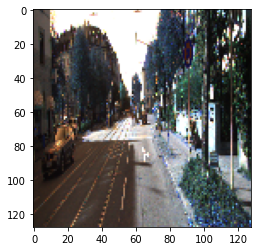

In [ ]:
#Check the images
plt.imshow(X[1])

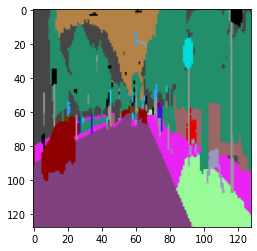

In [ ]:
#Check the mask for the above image
plt.imshow(y[1])

(375, 1242, 3)


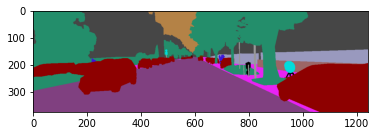

In [ ]:
# Checking a mask without resizing it
a = './training/semantic_rgb/000000_10.png'
img = cv2.imread(a, 1)
print(img.shape)
plt.imshow(img)

(128, 128, 3)


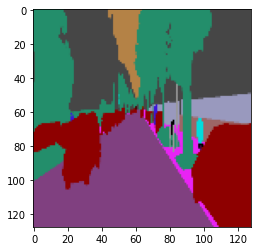

In [ ]:
# Resizing the above mask and checking it
img = cv2.resize(img, (128, 128))
print(img.shape)
plt.imshow(img)

### Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Split train and valid
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=2019)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(170, 128, 128, 3)
(170, 128, 128, 3)


### Model Building

In [ ]:
!pip install segmentation_models

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 5.1 MB/s 


In [ ]:
# Import required libraries
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Conv2D, Reshape, MaxPooling2D, Dropout, Conv2DTranspose, concatenate, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log
from tensorflow import reduce_sum
from tensorflow.keras.backend import epsilon
from segmentation_models import Unet

Segmentation Models: using `keras` framework.


In [ ]:
# Standard U-Net architecture

# The general architecture of u-net follows 2 CNN layers followed by maxpooling and dropout(optional)
# Left path - Contracting path (conv 3x3, max_pool 2x2), 
# Right path - Expansive path (conv 3x3, up-conv 2x2, conv 1x1)

def unet_model(input_layer, start_neurons):

    conv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(input_layer)
    conv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(conv1)
    pool1 = MaxPooling2D((2, 2))(conv1)
    pool1 = Dropout(0.25)(pool1)

    conv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(pool1)
    conv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(conv2)
    pool2 = MaxPooling2D((2, 2))(conv2)
    pool2 = Dropout(0.5)(pool2)

    conv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(pool2)
    conv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(conv3)
    pool3 = MaxPooling2D((2, 2))(conv3)
    pool3 = Dropout(0.5)(pool3)

    conv4 = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same")(pool3)
    conv4 = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same")(conv4)
    pool4 = MaxPooling2D((2, 2))(conv4)
    pool4 = Dropout(0.5)(pool4)

    # Middle
    convm = Conv2D(start_neurons * 16, (3, 3), activation="relu", padding="same")(pool4)
    convm = Conv2D(start_neurons * 16, (3, 3), activation="relu", padding="same")(convm)
    
    deconv4 = Conv2DTranspose(start_neurons * 8, (3, 3), strides=(2, 2), padding="same")(convm)
    uconv4 = concatenate([deconv4, conv4])
    uconv4 = Dropout(0.5)(uconv4)
    uconv4 = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same")(uconv4)
    uconv4 = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same")(uconv4)

    deconv3 = Conv2DTranspose(start_neurons * 4, (3, 3), strides=(2, 2), padding="same")(uconv4)
    uconv3 = concatenate([deconv3, conv3])
    uconv3 = Dropout(0.5)(uconv3)
    uconv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(uconv3)
    uconv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(uconv3)

    deconv2 = Conv2DTranspose(start_neurons * 2, (3, 3), strides=(2, 2), padding="same")(uconv3)
    uconv2 = concatenate([deconv2, conv2])
    uconv2 = Dropout(0.5)(uconv2)
    uconv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(uconv2)
    uconv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(uconv2)

    deconv1 = Conv2DTranspose(start_neurons * 1, (3, 3), strides=(2, 2), padding="same")(uconv2)
    uconv1 = concatenate([deconv1, conv1])
    uconv1 = Dropout(0.5)(uconv1)
    uconv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(uconv1)
    uconv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(uconv1)
    
    output_layer = Conv2D(3, (1,1), padding="same", activation="sigmoid")(uconv1)
    
    return output_layer

input_layer = Input((128, 128, 3))
output_layer = unet_model(input_layer, 16)

In [ ]:
# Passing the input and output layers to the Model
model = Model(input_layer, output_layer)

In [ ]:
#Model Summary
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 128, 128, 16  448         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_4 (Conv2D)              (None, 128, 128, 16  2320        ['conv2d_3[0][0]']               
                                )                                                           

### Dice Coefficient & Loss Function

In [ ]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tf.keras.backend.epsilon())

def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

In [ ]:
# Compile the mode with the defined loss function and metrics
model.compile(optimizer='Adam', loss=loss, metrics=[dice_coefficient])

In [ ]:
# Model Training
model.fit(X_train,y_train,batch_size=32,epochs=20,validation_data=(X_val, y_val))

Epoch 1/20
6/6 [==============================] - 44s 7s/step - loss: 1.4645 - dice_coefficient: 0.4659 - val_loss: 1.4350 - val_dice_coefficient: 0.4933
Epoch 2/20
6/6 [==============================] - 40s 7s/step - loss: 1.4501 - dice_coefficient: 0.4836 - val_loss: 1.4309 - val_dice_coefficient: 0.4860
Epoch 3/20
6/6 [==============================] - 44s 7s/step - loss: 1.4389 - dice_coefficient: 0.4911 - val_loss: 1.4209 - val_dice_coefficient: 0.5065
Epoch 4/20
6/6 [==============================] - 35s 6s/step - loss: 1.4350 - dice_coefficient: 0.4997 - val_loss: 1.4187 - val_dice_coefficient: 0.5013
Epoch 5/20
6/6 [==============================] - 34s 6s/step - loss: 1.4317 - dice_coefficient: 0.4937 - val_loss: 1.4183 - val_dice_coefficient: 0.4979
Epoch 6/20
6/6 [==============================] - 35s 6s/step - loss: 1.4292 - dice_coefficient: 0.4974 - val_loss: 1.4139 - val_dice_coefficient: 0.5054
Epoch 7/20
6/6 [==============================] - 39s 6s/step - loss: 1.4253

In [ ]:
model.evaluate(X_val, y_val)

1/1 [==============================] - 1s 1s/step - loss: 1.2845 - dice_coefficient: 0.5555


[1.2845396995544434, 0.5555490255355835]

### Extracting the test images

In [ ]:
import os
import cv2
test = []

for i in os.listdir('testing'):
  for j in os.listdir('testing', i):
    image = cv2.imread(os.path.join('testing', i, j))
    image = cv2.resize(image, (128,128))
    test.append(image)

In [ ]:
# Standardizing the test image
X_test = np.array(test)
X_test = X_test.astype('float32')
X_test = X_test/255.

In [ ]:
print(X_test.shape) # Only the first 51 images have been used for testing.

(51, 128, 128, 3)


[41 16 29 35 23]
5


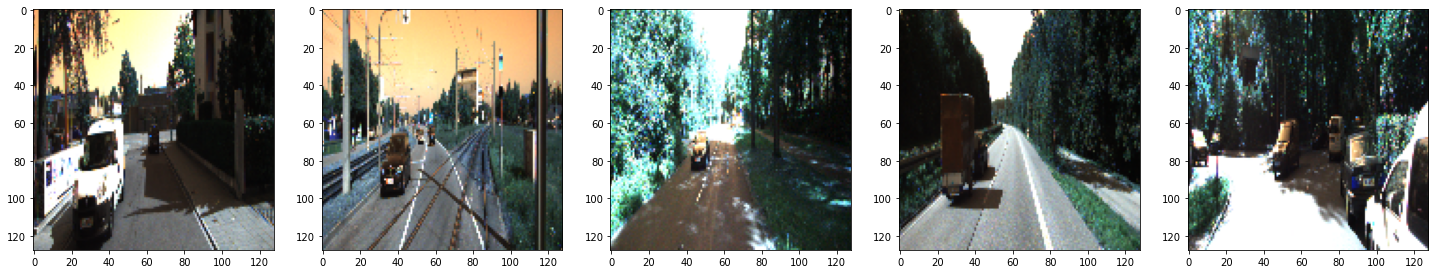

In [ ]:
# Show the test image
m = np.random.randint(0, len(X_test), 5)
print(m)
print(len(m))
plt.figure(figsize=(25,25))
for i,j in enumerate(m):
  plt.subplot(1,len(m),i+1)
  plt.imshow(X_test[j])

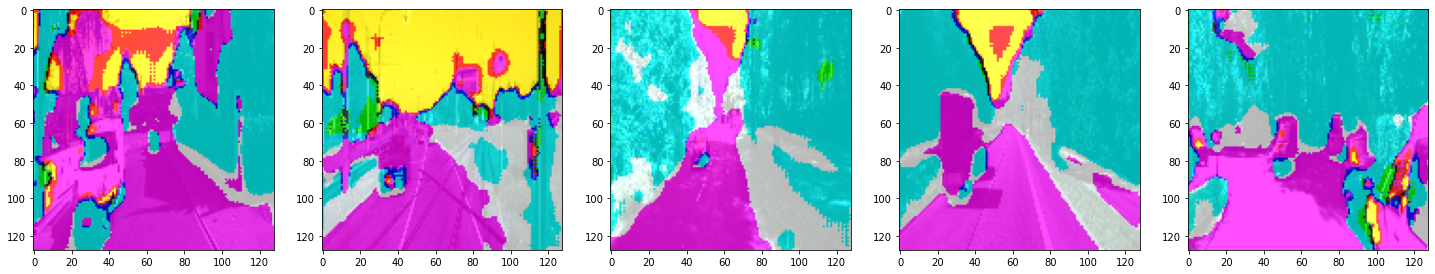

In [ ]:
# Predicting the mask for the test image
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128

plt.figure(figsize=(25,25))
for i,j in enumerate(m):
  plt.subplot(1,len(m),i+1)
  pred_mask = cv2.resize(1.0 * (model.predict(x=np.array([X_test[j]]))[0] > 0.5), (IMAGE_WIDTH, IMAGE_HEIGHT)) 

  # Impose the mask on the test image
  # In imshow use the alpha parameter and set it to greater than 0.5 to make the image transparent
  plt.imshow(X_test[j])
  plt.imshow(pred_mask, alpha=0.7) # vary this alpha to see the completely masked image

### Applying Pre-trained U-Net Model

- backbone - inceptionresnetv2,
- weights - imagenet

In [ ]:
# Define the pretrained model

import segmentation_models as sm
from tensorflow.keras.layers import Concatenate
sm.set_framework('tf.keras')
sm.framework()

N = X_train.shape[-1]
# https://github.com/qubvel/segmentation_models - Check for different backbones
base_model = Unet(backbone_name='inceptionresnetv2', encoder_weights='imagenet')
input_base_model = Input(shape=(128, 128, N))

conv = Conv2D(3, (1, 1))(input_base_model)
# Contracting Path
x0 = base_model(conv)
x1 = Conv2D(16, kernel_size =3,strides=2,padding = "same", activation="relu")(x0)
x1 =layers.BatchNormalization()(x1)
x2= Conv2D(16, kernel_size=3,strides=2,padding = "same", activation="relu")(x1)
x2 =layers.BatchNormalization()(x2)
x3 = Conv2D(10, kernel_size=3,strides=2,padding = "same", activation="relu")(x2)
x3 =layers.BatchNormalization()(x3)
x4 = Conv2D(3, kernel_size=2,strides=2,padding = "same", activation="relu")(x3)
x4 =layers.BatchNormalization()(x4)
# Expanding Path
x5 = Concatenate()([UpSampling2D()(x4), x3])
x6 = Concatenate()([UpSampling2D()(x5), x2])
x7 = Concatenate()([UpSampling2D()(x6), x1])
x = UpSampling2D()(x7)
x = Conv2D(3, kernel_size=1, activation="sigmoid")(x)
#Output layer
x_out = Reshape((IMAGE_HEIGHT, IMAGE_WIDTH, 3))(x)
    
# Passing input and output to model
model_Unet_pt = Model(input_base_model, x_out, name=base_model.name)

219070464/219055592 [==============================] - 6s 0us/step


In [ ]:
# Print model summary
model_Unet_pt.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_225 (Conv2D)            (None, 128, 128, 3)  12          ['input_6[0][0]']                
                                                                                                  
 model_2 (Functional)           (None, None, None,   62061553    ['conv2d_225[0][0]']             
                                1)                                                                
                                                                                            

In [ ]:
# Model Compilation

model_Unet_pt.compile(loss=loss, optimizer='adam', metrics=[dice_coefficient])

In [ ]:
# Define callbacks

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min")
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

In [ ]:
# Model fitting

model_Unet_pt.fit(X_train, y_train, epochs=20, batch_size=1, callbacks=[checkpoint, reduce_lr, stop])

Epoch 1/20
170/170 [==============================] - ETA: 0s - loss: 1.3821 - dice_coefficient: 0.5139
Epoch 1: loss improved from inf to 1.38206, saving model to model-1.38.h5
170/170 [==============================] - 219s 1s/step - loss: 1.3821 - dice_coefficient: 0.5139 - lr: 0.0010
Epoch 2/20
170/170 [==============================] - ETA: 0s - loss: 1.3361 - dice_coefficient: 0.5326
Epoch 2: loss improved from 1.38206 to 1.33613, saving model to model-1.34.h5
170/170 [==============================] - 191s 1s/step - loss: 1.3361 - dice_coefficient: 0.5326 - lr: 0.0010
Epoch 3/20
170/170 [==============================] - ETA: 0s - loss: 1.3109 - dice_coefficient: 0.5410
Epoch 3: loss improved from 1.33613 to 1.31087, saving model to model-1.31.h5
170/170 [==============================] - 204s 1s/step - loss: 1.3109 - dice_coefficient: 0.5410 - lr: 0.0010
Epoch 4/20
170/170 [==============================] - ETA: 0s - loss: 1.2922 - dice_coefficient: 0.5471
Epoch 4: loss improve

In [ ]:
model_Unet_pt.evaluate(X_val, y_val)

1/1 [==============================] - 9s 9s/step - loss: 1.2066 - dice_coefficient: 0.5816


[1.206583857536316, 0.5815979242324829]

[31 29  5 49  1]
5


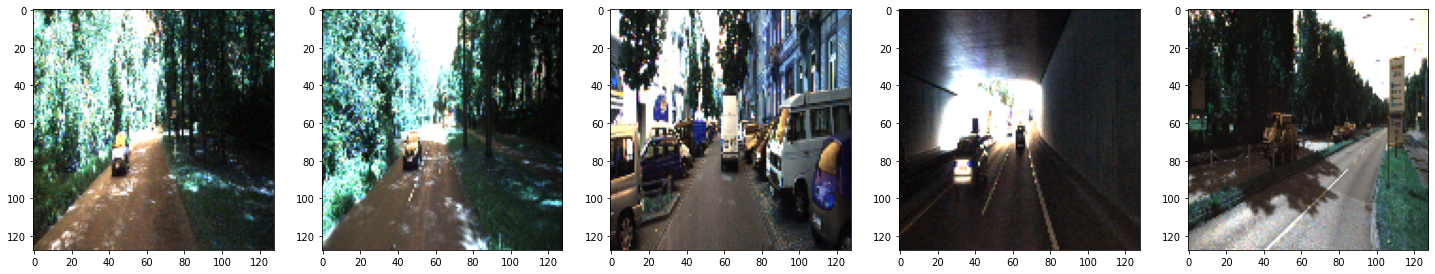

In [ ]:
# Show the test image
m = np.random.randint(0, len(X_test), 5)
print(m)
print(len(m))
plt.figure(figsize=(25,25))
for i,j in enumerate(m):
  plt.subplot(1,len(m),i+1)
  plt.imshow(X_test[j])

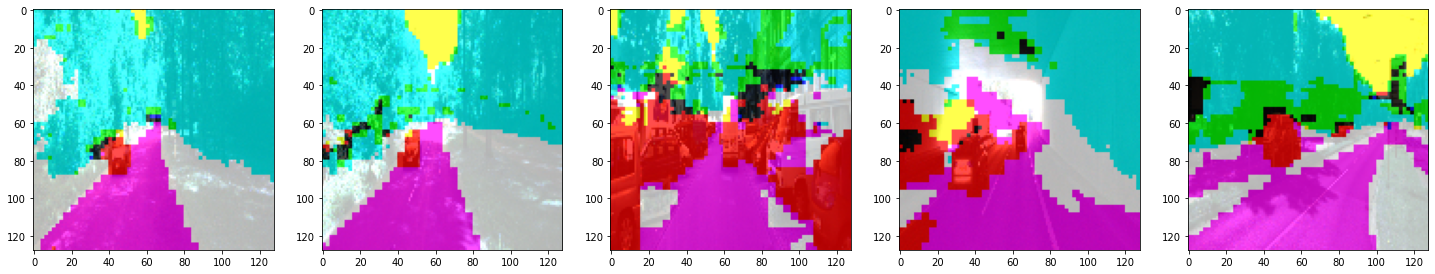

In [ ]:
# Predicting the mask for the test image
IMAGE_WIDTH = 128
IMAGE_HEIGHT = 128

plt.figure(figsize=(25,25))
for i,j in enumerate(m):
  plt.subplot(1,len(m),i+1)
  pred_mask = cv2.resize(1.0 * (model_Unet_pt.predict(x=np.array([X_test[j]]))[0] > 0.5), (IMAGE_WIDTH, IMAGE_HEIGHT)) 

  # Impose the mask on the test image
  # In imshow use the alpha parameter and set it to greater than 0.5 to make the image transparent
  plt.imshow(X_test[j])
  plt.imshow(pred_mask, alpha=0.7) # vary this alpha to see the completely masked image